<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt

# Feature Engineering
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import * 
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb
from xgboost import *

# Model evaluation
from sklearn import metrics
from sklearn.metrics import *

print("Loading complete.")

Loading complete.


In [2]:
# Loading the dataset
dataset = pd.read_csv("Data_for_UCI_named.csv")
dataset

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [3]:
# Drop the "stab" column
dataset.drop(columns = ["stab"], inplace= True)

In [4]:
# Encode the target column
dataset["stabf"].replace({"stable":1, "unstable":0}, inplace= True)

In [5]:
# Train-test-split
X = dataset.drop(columns=["stabf"])
y = dataset["stabf"]

# Splitting the dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [6]:
# Scaling the datasets
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Defining a helper function to fit models to data and score them
def classification_fit_and_score(models, X_train= X_train, X_test= X_test, 
                                 y_train= y_train, y_test= y_test):
    # Looping through the models to fit and score each
    for name, model in models.items():

        # fitting to the training data
        model.fit(X_train, y_train)

        # making predictions
        y_pred = model.predict(X_test)
        
        # Evaluating the model
        model_classification_report = classification_report(y_test, y_pred)
        print(f"{name} Model Classification Report", "\n", model_classification_report)
        
        # Defining the Confusion Matrix
        model_confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred)).reset_index(drop=True)
        print(f"{name} Confusion Matrix:", "\n", model_confusion_matrix)
        
        # Visualizing the Confusion Matrix
        # Display Confusion Matrix directly from predictions
        ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
        plt.show()
        
    return None

In [8]:
# Instantiate the models
dt_model = DecisionTreeClassifier(random_state=1)
etc_model = ExtraTreesClassifier(random_state=1)
xgb_model = XGBClassifier(random_state=1)
lgb_model = lgb.LGBMClassifier(random_state=1)
rf_model = RandomForestClassifier(random_state=1)

# Create a dictionary of models
models = {
    "Decision Tree Classifier": dt_model,
    "Extra Trees Classifier": etc_model,
    "XGBoost": xgb_model,
    "LightGBM": lgb_model,
    "Random Forest Model": rf_model
}

Decision Tree Classifier Model Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.88      0.89      1288
           1       0.79      0.80      0.79       712

    accuracy                           0.85      2000
   macro avg       0.84      0.84      0.84      2000
weighted avg       0.85      0.85      0.85      2000

Decision Tree Classifier Confusion Matrix: 
       0    1
0  1139  149
1   145  567


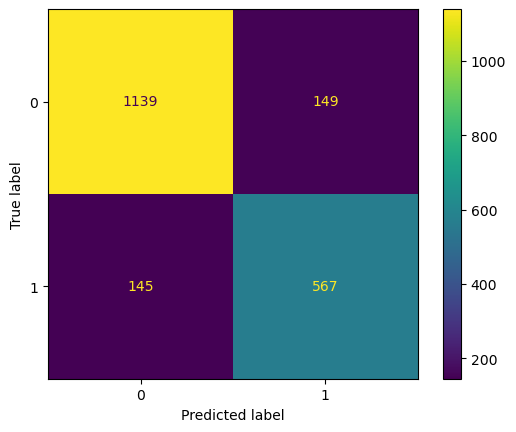

Extra Trees Classifier Model Classification Report 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      1288
           1       0.95      0.84      0.89       712

    accuracy                           0.93      2000
   macro avg       0.93      0.91      0.92      2000
weighted avg       0.93      0.93      0.93      2000

Extra Trees Classifier Confusion Matrix: 
       0    1
0  1257   31
1   112  600


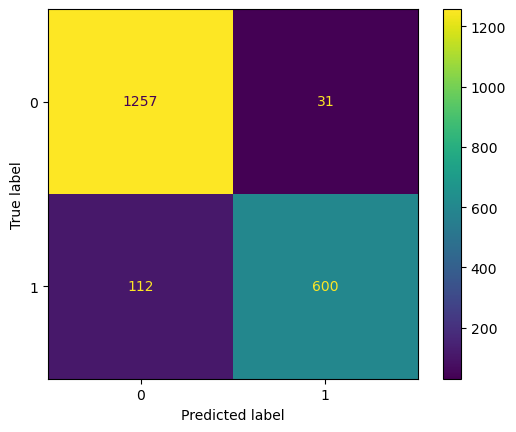

XGBoost Model Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      1288
           1       0.94      0.91      0.92       712

    accuracy                           0.95      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.95      0.95      0.95      2000

XGBoost Confusion Matrix: 
       0    1
0  1243   45
1    64  648


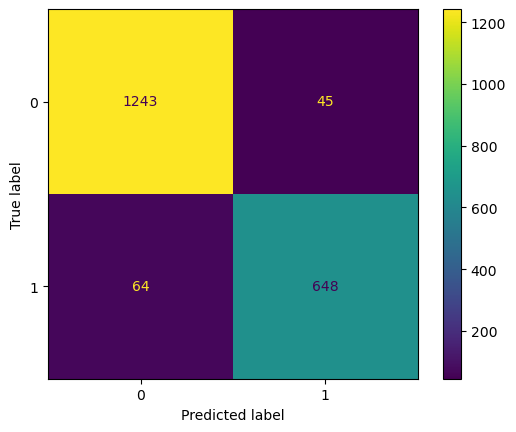

LightGBM Model Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.96      0.95      1288
           1       0.93      0.90      0.91       712

    accuracy                           0.94      2000
   macro avg       0.94      0.93      0.93      2000
weighted avg       0.94      0.94      0.94      2000

LightGBM Confusion Matrix: 
       0    1
0  1238   50
1    71  641


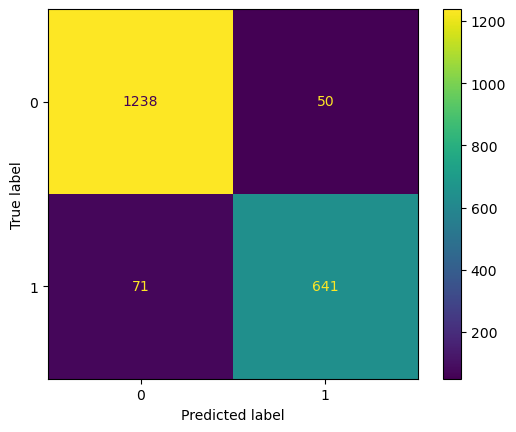

Random Forest Model Model Classification Report 
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      1288
           1       0.93      0.87      0.90       712

    accuracy                           0.93      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.93      0.93      2000

Random Forest Model Confusion Matrix: 
       0    1
0  1238   50
1    91  621


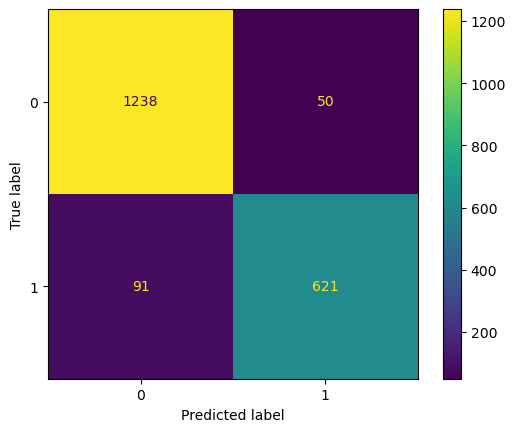

In [9]:
summary = classification_fit_and_score(models = models)

In [10]:
# Defining a helper function to evaluate the models at a go
def model_evaluation(fit_models, X_test, y_test):
    results = []
    for name, model in fit_models.items():
        pred = model.predict(X_test)

        f2_score = fbeta_score(y_test, pred, beta=0.5)
        f2_score = "{:.5f}".format(f2_score)

        results.append([
            name,
            precision_score(y_test, pred),
            recall_score(y_test, pred),
            f1_score(y_test, pred),
            accuracy_score(y_test, pred)
        ])

    eval_df = pd.DataFrame(results, columns=["model", "precision", "recall", "f1_weighted", "accuracy"])
    eval_df.set_index("model", inplace=True)
    return eval_df

In [11]:
model_eval = model_evaluation(models, X_test, y_test)
model_eval

,precision,recall,f1_weighted,accuracy
model,,,,
Decision Tree Classifier,0.791899,0.796348,0.794118,0.8530
Extra Trees Classifier,0.950872,0.842697,0.893522,0.9285
XGBoost,0.935065,0.910112,0.922420,0.9455
LightGBM,0.927641,0.900281,0.913756,0.9395
Random Forest Model,0.925484,0.872191,0.898048,0.9295


In [12]:
# Defining the values for the RandomizedSearchCV
random_grid = {"n_estimators": list(range(100, 1001, 100)),
               "min_samples_split": list(range(2, 10, 1)),
               "min_samples_leaf": list(range(3, 10, 1)),
               "max_features": [None, "auto", "log2"],
               }

In [13]:
# Running the RandomizedSearch Cross-Validation with the above set of Parameters
etc_rs_cv_model = RandomizedSearchCV(estimator= etc_model,
                                     param_distributions= random_grid,
                                     n_iter= 10,
                                     cv= 5,
                                     random_state= 1,
                                     n_jobs= -1, 
                                     verbose = 1)

# Fitting the model to the training data
etc_rs_cv_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=1),
                   n_jobs=-1,
                   param_distributions={'max_features': [None, 'auto', 'log2'],
                                        'min_samples_leaf': [3, 4, 5, 6, 7, 8,
                                                             9],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=1, verbose=1)

In [14]:
# Looking at the best combination of hyperparameters for the model
best_params = etc_rs_cv_model.best_params_
print("The best combination of hyperparameters for the model will be:")
for param_name in sorted(best_params.keys()):
    print(f"{param_name} : {best_params[param_name]}")

The best combination of hyperparameters for the model will be:
max_features : None
min_samples_leaf : 4
min_samples_split : 8
n_estimators : 500


In [15]:
# Training a new model with the parameters from the RandomizedSearchCV
new_extra_trees_model = ExtraTreesClassifier(random_state=1, 
                                             max_features= None, 
                                             min_samples_leaf = 4, 
                                             min_samples_split = 8, 
                                             n_estimators = 500)

# Fitting the model to the training data
new_extra_trees_model.fit(X_train, y_train)

ExtraTreesClassifier(max_features=None, min_samples_leaf=4, min_samples_split=8,
                     n_estimators=500, random_state=1)

In [16]:
new_models_eval = model_evaluation(fit_models= {"Randomized Search Extra Trees": etc_rs_cv_model, 
                                                "New Extra Trees": new_extra_trees_model}, 
                                                X_test = X_test, y_test = y_test)
new_models_eval

,precision,recall,f1_weighted,accuracy
model,,,,
Randomized Search Extra Trees,0.92511,0.884831,0.904523,0.9335
New Extra Trees,0.92511,0.884831,0.904523,0.9335


In [17]:
# Creating a dataframe of the features and their importances for plotting
feature_importances = pd.DataFrame(new_extra_trees_model.feature_importances_, 
                                   index= dataset.drop(columns = ["stabf"]).columns).reset_index()
feature_importances.rename(columns= {"index": "Feature", 0: "Importance"},inplace= True)
feature_importances.sort_values(by= "Importance", ascending= False, inplace= True)
feature_importances

,Feature,Importance
1,tau2,0.135056
0,tau1,0.133123
3,tau4,0.130239
2,tau3,0.130150
10,g3,0.111799
11,g4,0.108436
9,g2,0.107800
8,g1,0.102993
6,p3,0.010956
5,p2,0.010876
